# pipeVibSim Example

This notebook demonstrates how to use the `pipeVibSim` library to perform a vibration analysis of a 3D pipe.

In [1]:
import numpy as np
from pipeVibSim.pipe_path import PipePath
from pipeVibSim.materials import get_material_properties
from pipeVibSim.simulation import VibrationAnalysis
import pipeVibSim.postprocessing as post

## 1. Define Pipe Geometry

In [2]:
points = np.array([
    [0, 0, 0],    # origin
    [1, 0, 0],    # 1st virtual point
    [1, 0, 1],    # 2nd virtual point
    [1, 1, 1]     # last point
], dtype=float) * 0.1

pipe_path = PipePath(points, radius=0.03, step=0.01)

## 2. Define Material Properties

In [ ]:
n_elements=pipe_path.node_positions.shape[0] - 1

material_properties = get_material_properties(
    E=np.ones(n_elements) * 110.0e9,      # Young's modulus (Pa)
    rho=np.ones(n_elements) * 8960.0,     # Density (kg/m^3)
    nu=np.ones(n_elements) * 0.34,        # Poisson's ratio
    D_out=np.ones(n_elements) * 0.01,     # Outer diameter (m)
    D_in=np.ones(n_elements) * 0.008,     # Inner diameter (m)
    n_elements=n_elements
)

TypeError: get_material_properties() missing 1 required positional argument: 'n_elements'

## 3. Perform Vibration Analysis

In [4]:
analysis = VibrationAnalysis(pipe_path, material_properties)

## 4. Apply Constraints

In [5]:
# Fix the first node (origin) in all 6 degrees of freedom (translations and rotations)
constraints = [(0, None)]
analysis.substructure_by_coordinate(constraints)
print("System constrained at the origin.")

System constrained at the origin.


### Eigensolution

In [6]:
shapes = analysis.run_eigensolution(maximum_frequency=4000)
print(shapes)

   Index,  Frequency,    Damping,     # DoFs
    (0,),   105.4838,    0.0000%,        162
    (1,),   116.5380,    0.0000%,        162
    (2,),   306.4470,    0.0000%,        162
    (3,),   339.2789,    0.0000%,        162
    (4,),   689.4813,    0.0000%,        162
    (5,),  1006.4920,    0.0000%,        162
    (6,),  2334.8682,    0.0000%,        162
    (7,),  2629.8392,    0.0000%,        162
    (8,),  3918.0991,    0.0000%,        162
    (9,),  3978.7106,    0.0000%,        162



### Plot Mode Shapes

In [7]:
post.plot_mode_shapes(analysis.geometry, shapes)

### Frequency Response Function (FRF)

In [8]:
frequencies = np.linspace(0., 500, 1000)
frf = analysis.run_frf(frequencies, load_dof_indices=-4, response_dof_indices=-4)

### Plot FRF

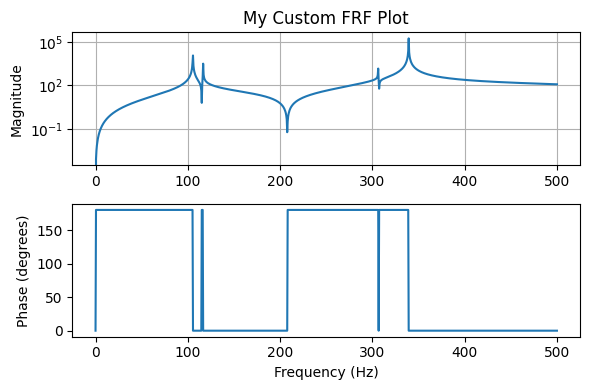

In [20]:
fig, axes = post.plot_frf(frf)
axes[0].set_title('My Custom FRF Plot')
axes[0].grid(True)
fig.set_size_inches(6, 4)
fig.tight_layout()

## 5. Reset System and Re-run Analysis (without constraints)

In [12]:
analysis.reset_system()
print("System reset to initial unconstrained state.")

System reset to initial unconstrained state.


### Eigensolution (unconstrained)

In [13]:
shapes_unconstrained = analysis.run_eigensolution(maximum_frequency=4000)
print(shapes_unconstrained)

   Index,  Frequency,    Damping,     # DoFs
    (0,),     0.0000,    0.0000%,        162
    (1,),     0.0000,    0.0000%,        162
    (2,),     0.0000,    0.0000%,        162
    (3,),     0.0108,    0.0000%,        162
    (4,),     0.0108,    0.0000%,        162
    (5,),     0.0108,    0.0000%,        162
    (6,),   429.1092,    0.0000%,        162
    (7,),   836.0158,    0.0000%,        162
    (8,),   858.0207,    0.0000%,        162
    (9,),  2498.0613,    0.0000%,        162
   (10,),  2515.3913,    0.0000%,        162
   (11,),  3924.3180,    0.0000%,        162
   (12,),  3978.0562,    0.0000%,        162



### Plot Mode Shapes (unconstrained)

In [14]:
post.plot_mode_shapes(analysis.geometry, shapes_unconstrained)

### Frequency Response Function (FRF) (unconstrained)

In [15]:
frf_unconstrained = analysis.run_frf(frequencies, load_dof_indices=-4, response_dof_indices=-4)
print(frf_unconstrained)

TransferFunctionArray with shape 1 x 1 and 1000 elements per function


### Plot FRF (unconstrained)

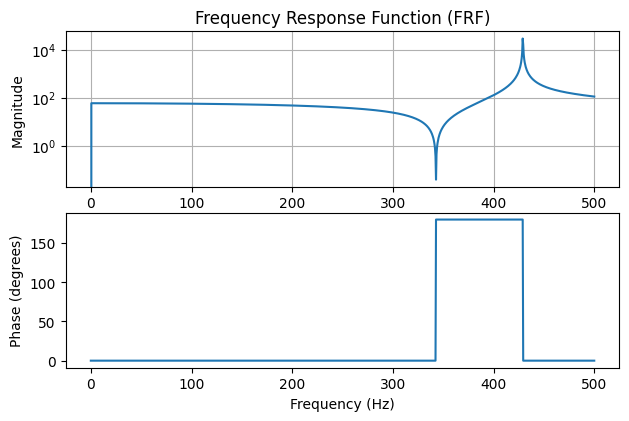

In [22]:
fig, axes = post.plot_frf(frf_unconstrained)
axes[0].grid(True)
fig.set_size_inches(6, 4)